In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_csv("Finaldemand.csv") #reading data

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0,1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df=df[df['orderNumber']!='Not Assigned']
df['PCRD']=pd.to_datetime(df['PCRD'],format='%Y%m%d')
#df['orderDate']=pd.to_datetime(df['orderDate'],format='%Y%m%d')
df['customerParentID'].nunique()
#df=df.groupby(['PCRD','customerParentID','forecastGroup'],as_index=False)['demandQuantity'].sum() 

462

In [3]:
df.head()

,orderNumber,orderLine,material,orderDate,PCRD,forecastGroup,customerParentID,demandQuantity,dollars,forecastGroup.1,pdpStage,pdpKickoffDate,pdpProdReleaseDate,marketSubgroup,businessGroup,businessUnitShort,productLineDesc,vcMarketingManager,vcProductManager
0,1163546,100,QM56022TR13-5K,20180116,2018-01-16,QM56022,102572,-2392930.0,-2251747.13,QM56022,PD6,20160330.0,20170630.0,4G/RF Flex,MP,RF BU,RF Solutions PL,Stewart Copenhaver,Ashok Bhupathiraju
1,1170176,11,QM56022TR13-5K,20180212,2018-02-12,QM56022,102572,-1230000.0,-1157430.00,QM56022,PD6,20160330.0,20170630.0,4G/RF Flex,MP,RF BU,RF Solutions PL,Stewart Copenhaver,Ashok Bhupathiraju
2,60016739,10,QM14003TR13-5KSAM,20160825,2016-08-25,QM14003,100099,-874602.0,-95331.62,QM14003,PD7,20150805.0,20151221.0,LNA,MP,DS BU,Discrete Solutions PL,Sarang Kayande,MingYuan Zhao
3,1126061,30,1115069,20171024,2017-10-24,885075,102572,-621243.0,-129839.79,885075,PD6,20140415.0,20150326.0,Advanced Filtering,MP,DS BU,Discrete Solutions PL,Scott Baisey,Chris Scott
4,1198392,50,RF5212ATR13-5K,20180823,2018-08-23,RF5212A,107372,-585000.0,-218790.00,RF5212A,PD6,20160311.0,20160629.0,4G/RF Flex,MP,RF BU,CMOS PA PL,Stewart Copenhaver,Ashok Bhupathiraju


In [4]:
min_df              = df.groupby(['customerParentID','forecastGroup'],as_index=False)['PCRD'].min()
min_df['Min Year']  = min_df['PCRD'].dt.year
min_df['Min Month'] = min_df['PCRD'].dt.month

max_df              = df.groupby(['customerParentID','forecastGroup'],as_index=False)['PCRD'].max()
max_df['Max Year']  = max_df['PCRD'].dt.year
max_df['Max Month'] = max_df['PCRD'].dt.month

In [5]:
max_df[max_df['Max Year'] == 2018]['Max Month'].value_counts()

10    958
9     800
11    755
8     566
12    565
3     511
7     466
6     441
2     417
5     399
1     322
4     232
Name: Max Month, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282802 entries, 0 to 282801
Data columns (total 19 columns):
orderNumber           282802 non-null object
orderLine             282802 non-null object
material              282802 non-null object
orderDate             282802 non-null object
PCRD                  282802 non-null datetime64[ns]
forecastGroup         282654 non-null object
customerParentID      282802 non-null int64
demandQuantity        282802 non-null float64
dollars               282802 non-null float64
forecastGroup.1       282654 non-null object
pdpStage              282654 non-null object
pdpKickoffDate        248520 non-null float64
pdpProdReleaseDate    268551 non-null float64
marketSubgroup        282654 non-null object
businessGroup         282654 non-null object
businessUnitShort     282654 non-null object
productLineDesc       282654 non-null object
vcMarketingManager    275692 non-null object
vcProductManager      280233 non-null object
dtypes: datetime64[ns](

In [7]:
df1 = df.groupby(['forecastGroup','customerParentID','PCRD'],as_index=False)[['demandQuantity','dollars']].sum() 

In [8]:
df1.loc[(df1.demandQuantity<0),'demandQuantity'] = 0 # eliminate negatives


In [9]:
from datetime import date
today = str(date.today())
df1   = df1[df1['PCRD'].isin(pd.date_range('2016-01-01','2018-06-30'))]

In [10]:
df1['PCRD'].min()

Timestamp('2016-01-04 00:00:00')

In [11]:
df1['PCRD'].max()

Timestamp('2018-06-30 00:00:00')

In [12]:
df1.describe()

,customerParentID,demandQuantity,dollars
count,156328.000000,1.563280e+05,1.563280e+05
mean,103651.462700,8.227118e+04,3.862949e+04
std,2406.583696,3.400184e+05,1.707560e+05
min,100073.000000,0.000000e+00,-2.388192e+06
25%,101395.000000,7.500000e+02,1.600000e+03
50%,103627.000000,6.400000e+03,6.510000e+03
75%,105697.000000,4.000000e+04,2.359625e+04
max,108318.000000,1.819500e+07,1.720800e+07


In [13]:
df1['PCRD Month']=df1['PCRD'].dt.month
df1['PCRD Year']=df1['PCRD'].dt.year
df2=df1.groupby(['forecastGroup','customerParentID','PCRD Year','PCRD Month'],as_index=False)[['demandQuantity','dollars']].sum()
#df2['demandQuantity'] =  df2['demandQuantity'].apply(pd.np.log1p) #logarithm conversion

In [14]:
np.append(df2['PCRD Year'].unique(),[np.max(df2['PCRD Year'].unique())+1,2020])

array([2016, 2017, 2018, 2019, 2020], dtype=int64)

In [15]:
#generating all possible FG customer and month combination
u_years     = df2['PCRD Year'].unique()
u_months    = df2['PCRD Month'].unique()
u_customers = df2.customerParentID.unique()
u_items     = df2.forecastGroup.unique()
df2.set_index(['PCRD Year', 'PCRD Month','customerParentID', 'forecastGroup'], inplace=True)

In [16]:
df2 = df2.reindex(
    pd.MultiIndex.from_product(
        (u_years,u_months, u_customers, u_items),
        names=['PCRD Year','PCRD Month','customerParentID','forecastGroup']
    )
)

In [17]:
df2=df2.reset_index()

In [18]:
df2.loc[~((df2['PCRD Year']==2018)&(df2['PCRD Month'].isin([7,8,9,10,11,12]))),'demandQuantity'] = df2.loc[~((df2['PCRD Year']==2018)&(df2['PCRD Month'].isin([7,8,9,10,11,12]))),'demandQuantity'].fillna(0) # fill NaNs
df2.loc[~((df2['PCRD Year']==2018)&(df2['PCRD Month'].isin([7,8,9,10,11,12]))),'dollars']        = df2.loc[~((df2['PCRD Year']==2018)&(df2['PCRD Month'].isin([7,8,9,10,11,12]))),'dollars'].fillna(0)

In [19]:
df2.head(50)

,PCRD Year,PCRD Month,customerParentID,forecastGroup,demandQuantity,dollars
0,2016,6,101325,1200,100.0,64.0
1,2016,6,101325,1201,0.0,0.0
2,2016,6,101325,1450,0.0,0.0
3,2016,6,101325,1480,0.0,0.0
4,2016,6,101325,1500100,0.0,0.0
5,2016,6,101325,1500101,0.0,0.0
6,2016,6,101325,1500102,0.0,0.0
7,2016,6,101325,1500437,0.0,0.0
8,2016,6,101325,1504332,0.0,0.0
9,2016,6,101325,1510016,0.0,0.0


In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56608344 entries, 0 to 56608343
Data columns (total 6 columns):
PCRD Year           int64
PCRD Month          int64
customerParentID    int64
forecastGroup       object
demandQuantity      float64
dollars             float64
dtypes: float64(2), int64(3), object(1)
memory usage: 2.5+ GB


In [21]:
len(df2[df2['demandQuantity']==0]['demandQuantity'])/len(df2['demandQuantity'])

0.8321139724560747

In [22]:
df2['PCRD Month'].unique()

array([ 6,  8, 11,  9, 10,  5, 12,  7,  1,  3,  4,  2], dtype=int64)

In [23]:
df2[df2['PCRD Year']==2018]['PCRD Month'].unique()

array([ 6,  8, 11,  9, 10,  5, 12,  7,  1,  3,  4,  2], dtype=int64)

In [24]:
#df2=df2.drop(df2[(df2['PCRD Year']==2018)&(df2['PCRD Month'].isin([9,10,11,12]))].index)

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56608344 entries, 0 to 56608343
Data columns (total 6 columns):
PCRD Year           int64
PCRD Month          int64
customerParentID    int64
forecastGroup       object
demandQuantity      float64
dollars             float64
dtypes: float64(2), int64(3), object(1)
memory usage: 2.5+ GB


In [26]:
f=df2.drop(df2[(df2['PCRD Year']==2018)&(df2['PCRD Month'].isin([7,8,9,10,11,12]))].index).groupby(['customerParentID','forecastGroup'],as_index=False)['demandQuantity'].agg(lambda x : (x!=0).sum()).sort_values(by='demandQuantity')

In [27]:
f.head()

,customerParentID,forecastGroup,demandQuantity
0,100073,1200,0.0
1047332,106562,QPW4284D,0.0
1047331,106562,QPW3848U,0.0
1047330,106562,QPW3845D,0.0
1047329,106562,QPW3844D,0.0


In [28]:
f.tail()

,customerParentID,forecastGroup,demandQuantity
536805,103627,RF5216A,27.0
756716,104784,RFPA2189,27.0
535221,103627,885075,27.0
904404,105758,RFPA5532,27.0
504079,103474,QM52042,29.0


In [29]:
zz = f.groupby('demandQuantity',as_index=False).count()
zz.head()

,demandQuantity,customerParentID,forecastGroup
0,0.0,1558354,1558354
1,1.0,4712,4712
2,2.0,2187,2187
3,3.0,1342,1342
4,4.0,1063,1063


In [30]:
f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1572454 entries, 0 to 504079
Data columns (total 3 columns):
customerParentID    1572454 non-null int64
forecastGroup       1572454 non-null object
demandQuantity      1572454 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 48.0+ MB


In [31]:
zz['customerParentID'].sum()

1572454

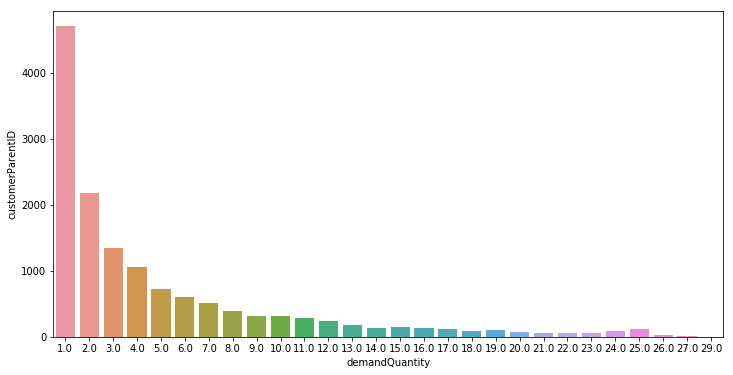

In [32]:
fig,axes = plt.subplots(figsize = (12,6))
sns.barplot(data = zz[zz['demandQuantity'] != 0], x = 'demandQuantity', y = 'customerParentID')

In [33]:
f1=f[f['demandQuantity'] == 0].copy()

In [34]:
f1.head()

,customerParentID,forecastGroup,demandQuantity
0,100073,1200,0.0
1047332,106562,QPW4284D,0.0
1047331,106562,QPW3848U,0.0
1047330,106562,QPW3845D,0.0
1047329,106562,QPW3844D,0.0


In [35]:
f1['c']=f1['customerParentID'].astype(str) + '-' + f1['forecastGroup']

In [36]:
f1.head()

,customerParentID,forecastGroup,demandQuantity,c
0,100073,1200,0.0,100073-1200
1047332,106562,QPW4284D,0.0,106562-QPW4284D
1047331,106562,QPW3848U,0.0,106562-QPW3848U
1047330,106562,QPW3845D,0.0,106562-QPW3845D
1047329,106562,QPW3844D,0.0,106562-QPW3844D


In [37]:
df2['c']=df2['customerParentID'].astype(str) + '-' + df2['forecastGroup']
df2=df2.drop(df2[df2['c'].isin(f1['c'])].index)

In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507600 entries, 0 to 56608309
Data columns (total 7 columns):
PCRD Year           507600 non-null int64
PCRD Month          507600 non-null int64
customerParentID    507600 non-null int64
forecastGroup       507600 non-null object
demandQuantity      423000 non-null float64
dollars             423000 non-null float64
c                   507600 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 31.0+ MB


In [39]:
df2.head()

,PCRD Year,PCRD Month,customerParentID,forecastGroup,demandQuantity,dollars,c
0,2016,6,101325,1200,100.0,64.0,101325-1200
1,2016,6,101325,1201,0.0,0.0,101325-1201
11,2016,6,101325,2044A,0.0,0.0,101325-2044A
14,2016,6,101325,2173,0.0,0.0,101325-2173
15,2016,6,101325,2174,0.0,0.0,101325-2174


In [40]:
df2=df2.sort_values(by =['customerParentID','forecastGroup','PCRD Year','PCRD Month'])

In [41]:
df2.drop('c',axis = 1,inplace=True)

In [42]:
df2.head()
df2 = df2.reset_index(drop=True)

In [43]:
cols = ['customerParentID','forecastGroup','PCRD Year','PCRD Month','demandQuantity','dollars']
df2 = df2[cols]

In [44]:
df2.head(40)

,customerParentID,forecastGroup,PCRD Year,PCRD Month,demandQuantity,dollars
0,100073,SPF5043Z,2016,1,0.0,0.0
1,100073,SPF5043Z,2016,2,0.0,0.0
2,100073,SPF5043Z,2016,3,0.0,0.0
3,100073,SPF5043Z,2016,4,0.0,0.0
4,100073,SPF5043Z,2016,5,0.0,0.0
5,100073,SPF5043Z,2016,6,0.0,0.0
6,100073,SPF5043Z,2016,7,0.0,0.0
7,100073,SPF5043Z,2016,8,0.0,0.0
8,100073,SPF5043Z,2016,9,0.0,0.0
9,100073,SPF5043Z,2016,10,0.0,0.0


In [45]:
for i in [6,7,8,9,10,11,12,15,18] :
    df2['lag'+'_'+str(i)]=df2.groupby(['customerParentID','forecastGroup'])['demandQuantity'].shift(i)
for w in [2,3,4,5,7,9] :
    df2['roll_mean'+'_'+str(w)]=df2.groupby(['customerParentID','forecastGroup'])['lag_6'].rolling(window=w,min_periods=1).mean().reset_index(drop=True)
for w in [2,3,4,5,7,9] :
    df2['roll_median'+'_'+str(w)]=df2.groupby(['customerParentID','forecastGroup'])['lag_6'].rolling(window=w,min_periods=1).median().reset_index(drop=True)
for a in [0.1,0.7,0.9] :
    df2['ewm'+'_'+str(a)]=df2.groupby(['customerParentID','forecastGroup'])['lag_6'].transform(lambda x : x.ewm(alpha=a).mean().values).reset_index(drop=True)


In [46]:
# for i in [6,7,8,9,10,11,12,15,18] :
#     df2['lag'+'_'+str(i)]=df2['lag'+'_'+str(i)].apply(pd.np.log1p)
# for w in [2,3,4,5,7,9] :
#     df2['roll_mean'+'_'+str(w)]=df2['roll_mean'+'_'+str(w)].apply(pd.np.log1p)
# for w in [2,3,4,5,7,9] :
#     df2['roll_median'+'_'+str(w)]=df2['roll_median'+'_'+str(w)].apply(pd.np.log1p)
# for a in [0.1,0.7,0.9] :
#     df2['ewm'+'_'+str(a)]=df2['ewm'+'_'+str(a)].apply(pd.np.log1p)


In [47]:
df2.head(50)

,customerParentID,forecastGroup,PCRD Year,PCRD Month,demandQuantity,dollars,lag_6,lag_7,lag_8,lag_9,...,roll_mean_9,roll_median_2,roll_median_3,roll_median_4,roll_median_5,roll_median_7,roll_median_9,ewm_0.1,ewm_0.7,ewm_0.9
0,100073,SPF5043Z,2016,1,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100073,SPF5043Z,2016,2,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100073,SPF5043Z,2016,3,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100073,SPF5043Z,2016,4,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100073,SPF5043Z,2016,5,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,100073,SPF5043Z,2016,6,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,100073,SPF5043Z,2016,7,0.0,0.0,0.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00
7,100073,SPF5043Z,2016,8,0.0,0.0,0.000000,0.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00
8,100073,SPF5043Z,2016,9,0.0,0.0,0.000000,0.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00
9,100073,SPF5043Z,2016,10,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00


In [48]:
df2.isnull().sum()

customerParentID         0
forecastGroup            0
PCRD Year                0
PCRD Month               0
demandQuantity       84600
dollars              84600
lag_6                84600
lag_7                98700
lag_8               112800
lag_9               126900
lag_10              141000
lag_11              155100
lag_12              169200
lag_15              211500
lag_18              253800
roll_mean_2          84600
roll_mean_3          84600
roll_mean_4          84600
roll_mean_5          84600
roll_mean_7          84600
roll_mean_9          84600
roll_median_2        84600
roll_median_3        84600
roll_median_4        84600
roll_median_5        84600
roll_median_7        84600
roll_median_9        84600
ewm_0.1              84600
ewm_0.7              84600
ewm_0.9              84600
dtype: int64

In [49]:
#df2.fillna(0,inplace=True)

In [50]:
df2.head()

,customerParentID,forecastGroup,PCRD Year,PCRD Month,demandQuantity,dollars,lag_6,lag_7,lag_8,lag_9,...,roll_mean_9,roll_median_2,roll_median_3,roll_median_4,roll_median_5,roll_median_7,roll_median_9,ewm_0.1,ewm_0.7,ewm_0.9
0,100073,SPF5043Z,2016,1,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100073,SPF5043Z,2016,2,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100073,SPF5043Z,2016,3,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100073,SPF5043Z,2016,4,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100073,SPF5043Z,2016,5,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df.head()

,orderNumber,orderLine,material,orderDate,PCRD,forecastGroup,customerParentID,demandQuantity,dollars,forecastGroup.1,pdpStage,pdpKickoffDate,pdpProdReleaseDate,marketSubgroup,businessGroup,businessUnitShort,productLineDesc,vcMarketingManager,vcProductManager
0,1163546,100,QM56022TR13-5K,20180116,2018-01-16,QM56022,102572,-2392930.0,-2251747.13,QM56022,PD6,20160330.0,20170630.0,4G/RF Flex,MP,RF BU,RF Solutions PL,Stewart Copenhaver,Ashok Bhupathiraju
1,1170176,11,QM56022TR13-5K,20180212,2018-02-12,QM56022,102572,-1230000.0,-1157430.00,QM56022,PD6,20160330.0,20170630.0,4G/RF Flex,MP,RF BU,RF Solutions PL,Stewart Copenhaver,Ashok Bhupathiraju
2,60016739,10,QM14003TR13-5KSAM,20160825,2016-08-25,QM14003,100099,-874602.0,-95331.62,QM14003,PD7,20150805.0,20151221.0,LNA,MP,DS BU,Discrete Solutions PL,Sarang Kayande,MingYuan Zhao
3,1126061,30,1115069,20171024,2017-10-24,885075,102572,-621243.0,-129839.79,885075,PD6,20140415.0,20150326.0,Advanced Filtering,MP,DS BU,Discrete Solutions PL,Scott Baisey,Chris Scott
4,1198392,50,RF5212ATR13-5K,20180823,2018-08-23,RF5212A,107372,-585000.0,-218790.00,RF5212A,PD6,20160311.0,20160629.0,4G/RF Flex,MP,RF BU,CMOS PA PL,Stewart Copenhaver,Ashok Bhupathiraju


In [52]:
df1['D Week_Number'] = df1['PCRD'].dt.week
df1['D Year']=df1['PCRD'].dt.year
df1['D week']=df1['D Week_Number'].astype(str)+'-'+df1['D Year'].astype('str')
by_week=df1.groupby(['forecastGroup','D Year','D Week_Number','D week'],as_index=False)['demandQuantity'].sum()


In [53]:
hmm=by_week.groupby(['forecastGroup','D week'],as_index=False)['demandQuantity'].sum()
hmm['demandQuantity'] =  hmm['demandQuantity'].apply(pd.np.log1p) #logarithm conversion
materials=hmm.groupby(['forecastGroup'],as_index=False).agg({'demandQuantity' : ['mean','std','median','min','max']})

In [54]:
materials.columns=['mat'.join(col).strip() for col in materials.columns.values]

In [55]:
materials=materials.rename(columns={'forecastGroupmat' : 'forecastGroup'})
materials.head()

,forecastGroup,demandQuantitymatmean,demandQuantitymatstd,demandQuantitymatmedian,demandQuantitymatmin,demandQuantitymatmax
0,1200,9.060239,1.793108,8.537192,4.615121,11.289794
1,1201,7.731274,2.134784,7.824446,3.258097,11.461643
2,1450,9.242157,0.967850,8.922792,7.824446,11.407576
3,1480,7.824446,NaN,7.824446,7.824446,7.824446
4,1500100,8.582521,0.981596,8.824825,4.615121,9.661480


In [56]:
materials['cov_mat']=materials['demandQuantitymatmean']/materials['demandQuantitymatstd']

In [57]:
materials=pd.merge(materials,df[['forecastGroup','pdpStage','marketSubgroup','businessGroup','pdpKickoffDate','pdpProdReleaseDate','vcMarketingManager','vcProductManager']],on='forecastGroup',how='left')

In [58]:
materials.head()

,forecastGroup,demandQuantitymatmean,demandQuantitymatstd,demandQuantitymatmedian,demandQuantitymatmin,demandQuantitymatmax,cov_mat,pdpStage,marketSubgroup,businessGroup,pdpKickoffDate,pdpProdReleaseDate,vcMarketingManager,vcProductManager
0,1200,9.060239,1.793108,8.537192,4.615121,11.289794,5.052812,PD8,Discrete Switch,MP,20050907.0,20070329.0,Sarang Kayande,Joey Tilley
1,1200,9.060239,1.793108,8.537192,4.615121,11.289794,5.052812,PD8,Discrete Switch,MP,20050907.0,20070329.0,Sarang Kayande,Joey Tilley
2,1200,9.060239,1.793108,8.537192,4.615121,11.289794,5.052812,PD8,Discrete Switch,MP,20050907.0,20070329.0,Sarang Kayande,Joey Tilley
3,1200,9.060239,1.793108,8.537192,4.615121,11.289794,5.052812,PD8,Discrete Switch,MP,20050907.0,20070329.0,Sarang Kayande,Joey Tilley
4,1200,9.060239,1.793108,8.537192,4.615121,11.289794,5.052812,PD8,Discrete Switch,MP,20050907.0,20070329.0,Sarang Kayande,Joey Tilley


In [59]:
materials.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281840 entries, 0 to 281839
Data columns (total 14 columns):
forecastGroup              281840 non-null object
demandQuantitymatmean      281840 non-null float64
demandQuantitymatstd       280012 non-null float64
demandQuantitymatmedian    281840 non-null float64
demandQuantitymatmin       281840 non-null float64
demandQuantitymatmax       281840 non-null float64
cov_mat                    279861 non-null float64
pdpStage                   281840 non-null object
marketSubgroup             281840 non-null object
businessGroup              281840 non-null object
pdpKickoffDate             248010 non-null float64
pdpProdReleaseDate         268425 non-null float64
vcMarketingManager         274879 non-null object
vcProductManager           279427 non-null object
dtypes: float64(8), object(6)
memory usage: 32.3+ MB


In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
materials['pdpStage'] = le.fit_transform(materials['pdpStage'].values)
materials['marketSubgroup'] = le.fit_transform(materials['marketSubgroup'].values)
materials['businessGroup']=le.fit_transform(materials['businessGroup'].values)
materials['pdpKickoffDate']=materials.groupby('pdpStage')['pdpKickoffDate'].transform(lambda x : x.fillna(x.median()))
materials['pdpProdReleaseDate']=materials.groupby('pdpStage')['pdpProdReleaseDate'].transform(lambda x : x.fillna(x.median()))

In [61]:
materials['pdpKickoffDate']=materials['pdpKickoffDate'].transform(lambda x : x.fillna(materials[materials['pdpStage']==6]['pdpKickoffDate'].min()))
materials['pdpProdReleaseDate']=materials['pdpProdReleaseDate'].transform(lambda x : x.fillna(materials[materials['pdpStage']==6]['pdpKickoffDate'].min()))

In [62]:
materials['pdpKickoffDate'].nunique()

1257

In [63]:
df1['D Week_Number'] = df1['PCRD'].dt.week
df1['D Year']=df1['PCRD'].dt.year
df1['D week']=df1['D Week_Number'].astype(str)+'-'+df1['D Year'].astype('str')
by_week=df1.groupby(['customerParentID','D Year','D Week_Number','D week'],as_index=False)['demandQuantity'].sum()

In [64]:
hmm=by_week.groupby(['customerParentID','D week'],as_index=False)['demandQuantity'].sum()
hmm['demandQuantity'] =  hmm['demandQuantity'].apply(pd.np.log1p)
customers=hmm.groupby(['customerParentID'],as_index=False).agg({'demandQuantity' : ['mean','std','median','min','max']})

In [65]:
fc=pd.read_csv("fiscalcalendar.csv")
fc['fiscalDate']=pd.to_datetime(fc['fiscalDate'],format='%Y%m%d')

In [66]:
df1=pd.merge(df1,fc[['fiscalDate','fiscalQuarter']],left_on=['PCRD'],right_on=['fiscalDate'],how='left')

In [67]:
df1.head()

,forecastGroup,customerParentID,PCRD,demandQuantity,dollars,PCRD Month,PCRD Year,D Week_Number,D Year,D week,fiscalDate,fiscalQuarter
0,1200,101325,2016-06-13,100.0,64.0,6,2016,24,2016,24-2016,2016-06-13,2017-1
1,1200,103474,2016-08-26,300.0,0.0,8,2016,34,2016,34-2016,2016-08-26,2017-2
2,1200,103474,2016-11-01,10.0,0.0,11,2016,44,2016,44-2016,2016-11-01,2017-3
3,1200,103627,2016-08-22,2500.0,420.0,8,2016,34,2016,34-2016,2016-08-22,2017-2
4,1200,103627,2016-09-24,2500.0,420.0,9,2016,38,2016,38-2016,2016-09-24,2017-2


In [68]:
fc.head()

,fiscalDate,fiscalWeek,fiscalPeriod,fiscalQuarter,fiscalYear
0,1998-03-29,199901,199901,1999-1,1999
1,1998-03-30,199901,199901,1999-1,1999
2,1998-03-31,199901,199901,1999-1,1999
3,1998-04-01,199901,199901,1999-1,1999
4,1998-04-02,199901,199901,1999-1,1999


In [69]:
fc['fiscalDate'].max()

Timestamp('2026-03-28 00:00:00')

In [70]:
customers.columns=['cusw'.join(col).strip() for col in customers.columns.values]
customers['cov_cus']=customers['demandQuantitycuswmean']/customers['demandQuantitycuswstd']

In [71]:
hmm=df1.groupby(['customerParentID','fiscalQuarter'],as_index=False)['demandQuantity'].sum()
hmm['demandQuantity'] =  hmm['demandQuantity'].apply(pd.np.log1p)
customers2=hmm.groupby(['customerParentID'],as_index=False).agg({'demandQuantity' : ['mean','std','median','min','max']})

In [72]:
customers2.columns=['cusq'.join(col).strip() for col in customers2.columns.values]
customers2['cov_cus_Q']=customers2['demandQuantitycusqmean']/customers2['demandQuantitycusqstd']

In [73]:
customers=customers.rename(columns={'customerParentIDcusw' : 'customerParentID'})
customers2=customers2.rename(columns={'customerParentIDcusq' : 'customerParentID'})
customers=pd.merge(customers,customers2,on='customerParentID')

In [74]:
min_df              = df.groupby(['customerParentID','forecastGroup'],as_index=False)['PCRD'].min()
min_df['Min Year']  = min_df['PCRD'].dt.year
min_df['Min Month'] = min_df['PCRD'].dt.month

max_df              = df.groupby(['customerParentID','forecastGroup'],as_index=False)['PCRD'].max()
max_df['Max Year']  = max_df['PCRD'].dt.year
max_df['Max Month'] = max_df['PCRD'].dt.month

In [75]:
df                = df[df['PCRD'].isin(pd.date_range('2016-01-01','2018-06-30'))]

In [76]:
df_price=df.groupby(['forecastGroup','customerParentID','PCRD'],as_index=False).agg({'demandQuantity' : 'sum','dollars' : 'sum'}) 

In [77]:
df_price.head()

,forecastGroup,customerParentID,PCRD,demandQuantity,dollars
0,1200,101325,2016-06-13,100.0,64.0
1,1200,103474,2016-08-26,300.0,0.0
2,1200,103474,2016-11-01,10.0,0.0
3,1200,103627,2016-08-22,2500.0,420.0
4,1200,103627,2016-09-24,2500.0,420.0


In [78]:
df_price['price']=df_price['dollars']/df_price['demandQuantity']

In [79]:
df_price.isnull().sum()

forecastGroup        0
customerParentID     0
PCRD                 0
demandQuantity       0
dollars              0
price               25
dtype: int64

In [80]:
df_price.loc[:,'price'].fillna(0,inplace=True)

In [81]:
df_price.head()

,forecastGroup,customerParentID,PCRD,demandQuantity,dollars,price
0,1200,101325,2016-06-13,100.0,64.0,0.640
1,1200,103474,2016-08-26,300.0,0.0,0.000
2,1200,103474,2016-11-01,10.0,0.0,0.000
3,1200,103627,2016-08-22,2500.0,420.0,0.168
4,1200,103627,2016-09-24,2500.0,420.0,0.168


In [82]:
df_price.to_csv("price.csv",encoding='utf-8', index=False)

In [83]:
df_price_both=df_price.groupby(['customerParentID','forecastGroup'],as_index=False).agg({'price' : ['mean','std']})
df_price_both.columns=[''.join(col).strip() for col in df_price_both.columns.values]
df_price_both['cov_price']=df_price_both['pricemean']/df_price_both['pricestd']

In [84]:
hmm=df1.groupby(['customerParentID','forecastGroup','fiscalQuarter'],as_index=False)['demandQuantity'].sum()
hmm['demandQuantity'] =  hmm['demandQuantity'].apply(pd.np.log1p)
both_q=hmm.groupby(['customerParentID','forecastGroup'],as_index=False).agg({'demandQuantity' : ['mean','std','median','min','max']})
both_q.columns=['bothQ'.join(col).strip() for col in both_q.columns.values]
both_q['cov_bothq']=both_q['demandQuantitybothQmean']/both_q['demandQuantitybothQstd']
both_q=both_q.rename(columns={'customerParentIDbothQ' : 'customerParentID','forecastGroupbothQ' : 'forecastGroup'})

In [85]:
df1.head()

,forecastGroup,customerParentID,PCRD,demandQuantity,dollars,PCRD Month,PCRD Year,D Week_Number,D Year,D week,fiscalDate,fiscalQuarter
0,1200,101325,2016-06-13,100.0,64.0,6,2016,24,2016,24-2016,2016-06-13,2017-1
1,1200,103474,2016-08-26,300.0,0.0,8,2016,34,2016,34-2016,2016-08-26,2017-2
2,1200,103474,2016-11-01,10.0,0.0,11,2016,44,2016,44-2016,2016-11-01,2017-3
3,1200,103627,2016-08-22,2500.0,420.0,8,2016,34,2016,34-2016,2016-08-22,2017-2
4,1200,103627,2016-09-24,2500.0,420.0,9,2016,38,2016,38-2016,2016-09-24,2017-2


In [86]:
hmm=df1.groupby(['customerParentID','forecastGroup','D week'],as_index=False)['demandQuantity'].sum()
hmm['demandQuantity'] =  hmm['demandQuantity'].apply(pd.np.log1p)
both=hmm.groupby(['customerParentID','forecastGroup'],as_index=False).agg({'demandQuantity' : ['mean','std','median','min','max']})
both.columns=['bothW'.join(col).strip() for col in both.columns.values]
both['cov_both']=both['demandQuantitybothWmean']/both['demandQuantitybothWstd']
both=both.rename(columns={'customerParentIDbothW' : 'customerParentID','forecastGroupbothW' : 'forecastGroup'})

In [87]:
df_price_both.head()

,customerParentID,forecastGroup,pricemean,pricestd,cov_price
0,100073,SPF5043Z,1.810000,NaN,NaN
1,100073,X05-1834-G,4.040000,0.000000,inf
2,100083,856020,6.552500,8.505000,0.770429
3,100083,856496,0.970000,NaN,NaN
4,100083,856532,1.027143,0.051951,19.771397


In [88]:
df_price_mat=df_price_both.groupby('forecastGroup',as_index=False)['pricemean'].mean().rename(columns={'pricemean' : 'pricemeanmat'})
df_price_cus=df_price_both.groupby('customerParentID',as_index=False)['pricemean'].mean().rename(columns={'pricemean' : 'pricemeancus'})

In [89]:
materials.head()

,forecastGroup,demandQuantitymatmean,demandQuantitymatstd,demandQuantitymatmedian,demandQuantitymatmin,demandQuantitymatmax,cov_mat,pdpStage,marketSubgroup,businessGroup,pdpKickoffDate,pdpProdReleaseDate,vcMarketingManager,vcProductManager
0,1200,9.060239,1.793108,8.537192,4.615121,11.289794,5.052812,14,11,2,20050907.0,20070329.0,Sarang Kayande,Joey Tilley
1,1200,9.060239,1.793108,8.537192,4.615121,11.289794,5.052812,14,11,2,20050907.0,20070329.0,Sarang Kayande,Joey Tilley
2,1200,9.060239,1.793108,8.537192,4.615121,11.289794,5.052812,14,11,2,20050907.0,20070329.0,Sarang Kayande,Joey Tilley
3,1200,9.060239,1.793108,8.537192,4.615121,11.289794,5.052812,14,11,2,20050907.0,20070329.0,Sarang Kayande,Joey Tilley
4,1200,9.060239,1.793108,8.537192,4.615121,11.289794,5.052812,14,11,2,20050907.0,20070329.0,Sarang Kayande,Joey Tilley


In [90]:
df_price_mat.head()

,forecastGroup,pricemeanmat
0,1200,0.317625
1,1201,0.463925
2,1450,0.575800
3,1480,0.990000
4,1500100,17.950000


In [91]:
materials=materials.drop_duplicates()
customers=customers.drop_duplicates()

In [92]:
materials.groupby('forecastGroup',as_index = False).agg({'pdpProdReleaseDate' : lambda x : x.nunique()}).sort_values(by = 'pdpProdReleaseDate')

,forecastGroup,pdpProdReleaseDate
0,1200,1.0
2652,RFVC7147,1.0
2653,RFVC7148,1.0
2654,RFVC7150,1.0
2655,RFVC7152,1.0
2656,RFVC7154,1.0
2657,RFVC7157,1.0
2658,RFVC7158,1.0
2659,RFVC7159,1.0
2660,RFVC7160,1.0


In [93]:
df2.head()

,customerParentID,forecastGroup,PCRD Year,PCRD Month,demandQuantity,dollars,lag_6,lag_7,lag_8,lag_9,...,roll_mean_9,roll_median_2,roll_median_3,roll_median_4,roll_median_5,roll_median_7,roll_median_9,ewm_0.1,ewm_0.7,ewm_0.9
0,100073,SPF5043Z,2016,1,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100073,SPF5043Z,2016,2,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100073,SPF5043Z,2016,3,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100073,SPF5043Z,2016,4,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100073,SPF5043Z,2016,5,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507600 entries, 0 to 507599
Data columns (total 30 columns):
customerParentID    507600 non-null int64
forecastGroup       507600 non-null object
PCRD Year           507600 non-null int64
PCRD Month          507600 non-null int64
demandQuantity      423000 non-null float64
dollars             423000 non-null float64
lag_6               423000 non-null float64
lag_7               408900 non-null float64
lag_8               394800 non-null float64
lag_9               380700 non-null float64
lag_10              366600 non-null float64
lag_11              352500 non-null float64
lag_12              338400 non-null float64
lag_15              296100 non-null float64
lag_18              253800 non-null float64
roll_mean_2         423000 non-null float64
roll_mean_3         423000 non-null float64
roll_mean_4         423000 non-null float64
roll_mean_5         423000 non-null float64
roll_mean_7         423000 non-null float64
roll_mean_9     

In [95]:
df2=pd.merge(df2,materials,on='forecastGroup',how='left')
df2=pd.merge(df2,customers,on='customerParentID',how='left')
df2=pd.merge(df2,df_price_both,on=['customerParentID','forecastGroup'],how='left')
df2=pd.merge(df2,df_price_mat,on='forecastGroup',how='left')
df2=pd.merge(df2,df_price_cus,on='customerParentID',how='left')
df2=pd.merge(df2,both,on=['customerParentID','forecastGroup'],how='left')
df2=pd.merge(df2,both_q,on=['customerParentID','forecastGroup'],how='left')

In [96]:
df2['pdpKickoffDate']=pd.to_datetime(df2['pdpKickoffDate'],format='%Y%m%d')
df2['pdpKickoffDate_year']=df2['pdpKickoffDate'].dt.year
df2['pdpKickoffDate_month']=df2['pdpKickoffDate'].dt.month
df2['kickofftimediff']=(df2['PCRD Year']-df2['pdpKickoffDate_year'])*12+df2['PCRD Month']-df2['pdpKickoffDate_month']
df2['pdpProdReleaseDate']=pd.to_datetime(df2['pdpProdReleaseDate'],format='%Y%m%d')
df2['pdpProdReleaseDate_year']=df2['pdpProdReleaseDate'].dt.year
df2['pdpProdReleaseDate_month']=df2['pdpProdReleaseDate'].dt.month
df2['prodrelasetimediff']=(df2['PCRD Year']-df2['pdpProdReleaseDate_year'])*12+df2['PCRD Month']-df2['pdpProdReleaseDate_month']
df2['prodkicktimediff']=(df2['pdpProdReleaseDate_year']-df2['pdpKickoffDate_year'])*12+df2['pdpProdReleaseDate_month']-df2['pdpKickoffDate_month']
df2=df2.drop(['pdpKickoffDate','pdpProdReleaseDate'],axis=1)

In [97]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507600 entries, 0 to 507599
Data columns (total 77 columns):
customerParentID             507600 non-null int64
forecastGroup                507600 non-null object
PCRD Year                    507600 non-null int64
PCRD Month                   507600 non-null int64
demandQuantity               423000 non-null float64
dollars                      423000 non-null float64
lag_6                        423000 non-null float64
lag_7                        408900 non-null float64
lag_8                        394800 non-null float64
lag_9                        380700 non-null float64
lag_10                       366600 non-null float64
lag_11                       352500 non-null float64
lag_12                       338400 non-null float64
lag_15                       296100 non-null float64
lag_18                       253800 non-null float64
roll_mean_2                  423000 non-null float64
roll_mean_3                  423000 non-null flo

In [98]:
df2.to_csv("ML_with_test.csv",encoding='utf-8', index=False)